![UC logo](FCTUC_H_FundoClaro.png)

# JPEG Compressor and Decompressor

## Report + Code

__Done by:__
- Marco Pais - Nº 2019218
- Tiago Oliveira - Nº 2019219068
- Emílio - 

## Introduction

## Exercise 1

## Exercise 2

In [31]:
def encoder():  # 2

    img = openImage()

    # cm = getColormap() # 3.2

    # viewColormap(cm, img) # 3.3

    img = addPadding(img)  # 4.1

    global RGBBefore
    RGBBefore = img
    
    R, G, B = separateRGB(img)  # 3.4
    viewChanels(R, G, B) # 3.5

    YCbCr = RGBtoYCbCr(R, G, B)  # 5
    showYCbCr(YCbCr) # 5

    YD, CbD, CrD = downSample(YCbCr, dSample)  # 6
    showDownSample(YD, CbD, CrD) # 6

    Y_dct, Cb_dct, Cr_dct = calcDCT_8x8_64x64(YD, CbD, CrD)  # 7
    showDCT(Y_dct, Cb_dct, Cr_dct) # 7.1.2

    Y_Q, Cb_Q, Cr_Q = quantization(Y_dct, Cb_dct, Cr_dct) # 8
    showQuantization(Y_Q, Cb_Q, Cr_Q)

    Y_dcpm, Cb_dcpm, Cr_dcpm = DCPM(Y_Q, Cb_Q, Cr_Q) # 9
    showDCPM(Y_dcpm, Cb_dcpm, Cr_dcpm)

    return Y_dcpm, Cb_dcpm, Cr_dcpm

In [32]:
def decoder(Y_dcpm, Cb_dcpm, Cr_dcpm):  # 2
    Y_Q, Cb_Q, Cr_Q = IDCPM(Y_dcpm, Cb_dcpm, Cr_dcpm)

    Y_dct, Cb_dct, Cr_dct = deQuantization(Y_Q, Cb_Q, Cr_Q) # 8

    Y_enc, Cb_enc, Cr_enc = calcIDCT_8x8_64x64(Y_dct, Cb_dct, Cr_dct)  # 7

    YCbCrU = upSample(Y_enc, Cb_enc, Cr_enc, dSample)  # 6
    showUpSample(YCbCrU) # 6

    RGBAfter = YCbCrtoRGB(YCbCrU)  # 5

    RGBAfter = unpadding(RGBAfter)  # 4

    showRebuilt(RGBAfter)

## Exercise 3

In [33]:
def openImage():
    img = plt.imread(f'imagens/{img_name}.bmp')  # 3.1

    plt.figure(figsize=(5, 5))
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis('off')

    return img

In [34]:
def getColormap():  # 3.2
    inp = str(input("Introduza colormap (r, g, b): "))
    r, g, b = inp.split(",")
    cm = cb_linesr.LinearSegmentedColormap.from_list(
        'cm', [(0, 0, 0), (int(r), int(g), int(b))], N=256)
    return cm

In [35]:
def viewColormap(cm, img):  # 3.3
    plt.figure()
    plt.imshow(img, cm)

In [36]:
def separateRGB(img):  # 3.4
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]

    return R, G, B

In [37]:
def joinRGB(R, G, B):  # 3.4
    RGB = np.dstack((R, G, B))

    return RGB

In [38]:
def viewChanels(R, G, B):  # 3.5
    fig = plt.figure(figsize=(15, 5))
    plt.axis("off")
    fig.add_subplot(131)
    plt.title("Initial Red")
    plt.imshow(R, cmr)
    fig.add_subplot(132)
    plt.title("Initial Green")
    plt.imshow(G, cmg)
    fig.add_subplot(133)
    plt.title("Initial Blue")
    plt.imshow(B, cmb)

## Exercise 4

In [39]:
def addPadding(img):  # 4.1
    global h, w
    h, w, _ = np.shape(img)
    if opt == 64:
        pad = 128
    else:
        pad = 16

    if h % pad != 0:
        add = pad - (h % pad)
        arr = np.ones(h, dtype=int)
        arr[h-1] = add + 1
        img = np.repeat(img, arr, axis=0)

    if w % pad != 0:
        add = pad - (w % pad)
        arr = np.ones(w, dtype=int)
        arr[w-1] = add + 1
        img = np.repeat(img, arr, axis=1)
    return img

In [40]:
def unpadding(RGBAfter):  # 4
    R, G, B = separateRGB(RGBAfter)

    R = R[:h, :w]
    G = G[:h, :w]
    B = B[:h, :w]

    return joinRGB(R, G, B)

In [41]:
def showRebuilt(RGBAfter):
    plt.figure(figsize=(5, 5))
    plt.title("Rebuilt Image")
    plt.imshow(RGBAfter)
    plt.axis('off')

## Exercise 5

In [42]:
def RGBtoYCbCr(R, G, B):  # 5
    matrix = np.array([[0.299, 0.587, 0.114],
                       [-0.168736, -0.331264, 0.5],
                       [0.5, -0.418688, -0.081312]])

    RGB = joinRGB(R, G, B)

    YCbCr = RGB.dot(matrix.T)
    YCbCr[:, :, [1, 2]] += 128

    return YCbCr

In [43]:
def YCbCrtoRGB(YCbCr):  # 5
    matrix = np.array([[0.299, 0.587, 0.114],
                       [-0.168736, -0.331264, 0.5],
                       [0.5, -0.418688, -0.081312]])

    inverted = np.linalg.inv(matrix)
    YCbCr[:, :, [1, 2]] -= 128
    RGB = YCbCr.dot(inverted.T)
    RGB = RGB.round()
    RGB[RGB > 255] = 255
    RGB[RGB < 0] = 0
    RGB = RGB.astype(np.uint8)

    comp = RGB == RGBBefore
    res = comp.all()
    print("Equal to original RGB?\n" + str(res))

    return RGB

In [44]:
def showYCbCr(YCbCr):  # 5
    Y, Cb, Cr = separateYCbCr(YCbCr)

    fig = plt.figure(figsize=(15, 5))
    plt.axis("off")
    fig.add_subplot(131)
    plt.title("Y Original")
    plt.imshow(Y, cmGray)
    fig.add_subplot(132)
    plt.title("Cb Original")
    plt.imshow(Cb, cmGray)
    fig.add_subplot(133)
    plt.title("Cr Original")
    plt.imshow(Cr, cmGray)

In [45]:
def separateYCbCr(YCbCr):
    Y = YCbCr[:, :, 0]
    Cb = YCbCr[:, :, 1]
    Cr = YCbCr[:, :, 2]

    return Y, Cb, Cr

## Exercise 6

In [46]:
def downSample(YCbCr, dSample):  # 6
    Y, Cb, Cr = separateYCbCr(YCbCr)

    Cb = Cb[:, ::2]
    Cr = Cr[:, ::2]

    if(dSample == 420):
        Cb = Cb[::2, :]
        Cr = Cr[::2, :]

    return Y, Cb, Cr

In [47]:
def showDownSample(YD, CbD, CrD):  # 6
    fig = plt.figure(figsize=(15, 5))
    plt.axis("off")
    fig.add_subplot(131)
    plt.title("Y DownSampled")
    plt.imshow(YD, cmGray)
    fig.add_subplot(132)
    plt.title("Cb Downsampled")
    plt.imshow(CbD, cmGray)
    fig.add_subplot(133)
    plt.title("Cr Downsampled")
    plt.imshow(CrD, cmGray)

In [48]:
def upSample(YD, CbD, CrD, dSample):  # 6
    CbU = np.repeat(CbD, 2, axis=1)
    CrU = np.repeat(CrD, 2, axis=1)

    if np.shape(YD)[0] % 2 != 0:
        CbU = np.delete(CbU, -1, 0)
        CrU = np.delete(CrU, -1, 0)

    if dSample == 420:
        CbU = np.repeat(CbU, 2, axis=0)
        CrU = np.repeat(CrU, 2, axis=0)

        if np.shape(YD)[1] % 2 != 0:
            CbU = np.delete(CbU, -1, 1)
            CrU = np.delete(CrU, -1, 1)

    YCbCrU = np.dstack((YD, CbU, CrU))

    return YCbCrU

In [49]:
def showUpSample(YCbCr):
    Y, Cb, Cr = separateYCbCr(YCbCr)

    fig = plt.figure(figsize=(15, 5))
    plt.axis("off")
    fig.add_subplot(131)
    plt.title("Y UpSampled")
    plt.imshow(Y, cmGray)
    fig.add_subplot(132)
    plt.title("Cb UpSampled")
    plt.imshow(Cb, cmGray)
    fig.add_subplot(133)
    plt.title("Cr UpSampled")
    plt.imshow(Cr, cmGray)

## Exercise 7

In [50]:
def calcDCT_8x8_64x64(YD, CbD, CrD):  # 7
    if opt == 8 or opt == 64:
        Y_lines, Y_cols = np.shape(YD)
        Cb_lines, Cb_cols = np.shape(CbD)

        Y_dct = YD
        Cb_dct = CbD
        Cr_dct = CrD

        for i in range(0, Y_lines, opt):
            for j in range(0, Y_cols, opt):
                Y_dct[i:i+opt, j:j+opt] = dct(dct(Y_dct[i:i + opt,j:j + opt], norm="ortho").T, norm="ortho").T

        for i in range(0, Cb_lines, opt):
            for j in range(0, Cb_cols, opt):
                Cb_dct[i:i + opt, j:j + opt] = dct(dct(Cb_dct[i:i + opt, j:j + opt], norm="ortho").T, norm="ortho").T
                Cr_dct[i:i + opt, j:j + opt] = dct(dct(Cr_dct[i:i + opt, j:j + opt], norm="ortho").T, norm="ortho").T
    else:
        Y_dct = dct(dct(YD, norm='ortho').T, norm='ortho').T
        Cb_dct = dct(dct(CbD, norm='ortho').T, norm='ortho').T
        Cr_dct = dct(dct(CrD, norm='ortho').T, norm='ortho').T

    a = Y_dct.copy()
    b = Cb_dct.copy()
    c = Cr_dct.copy()

    Y_enc, Cb_enc, Cr_enc = calcIDCT_8x8_64x64(Y_dct, Cb_dct, Cr_dct)
    comp = Y_enc == YD
    res = comp.all()
    print("Equal to original Y_d?\n" + str(res))
    comp = Cb_enc == CbD
    res = comp.all()
    print("Equal to original Cb_d?\n" + str(res))
    comp = Cr_enc == CrD
    res = comp.all()
    print("Equal to original Cr_d?\n" + str(res))
    
    return a, b, c

In [51]:
def showDCT(Y_dct, Cb_dct, Cr_dct):  # 7.1.2
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(131)
    plt.title("Y_DCT - " + str(opt) + "x" + str(opt))
    plt.imshow(np.log(abs(Y_dct) + 0.0001), cmGray)
    fig.add_subplot(132)
    plt.title("Cb_DCT - " + str(opt) + "x" + str(opt))
    plt.imshow(np.log(abs(Cb_dct) + 0.0001), cmGray)
    fig.add_subplot(133)
    plt.title("Cr_DCT - " + str(opt) + "x" + str(opt))
    plt.imshow(np.log(abs(Cr_dct) + 0.0001), cmGray)

In [52]:
def calcIDCT_8x8_64x64(Y_dct, Cb_dct, Cr_dct):  # 7
    if opt == 8 or opt == 64:
        Y_lines, Y_cols = np.shape(Y_dct)
        Cb_lines, Cb_cols = np.shape(Cb_dct)

        Y = Y_dct
        Cb = Cb_dct
        Cr = Cr_dct

        for i in range(0, Y_lines, opt):
            for j in range(0, Y_cols, opt):
                Y[i:i+opt, j:j+opt] = idct(idct(Y[i:i + opt,j:j + opt], norm="ortho").T, norm="ortho").T

        for i in range(0, Cb_lines, opt):
            for j in range(0, Cb_cols, opt):
                Cb[i:i + opt, j:j + opt] = idct(idct(Cb[i:i + opt, j:j + opt], norm="ortho").T, norm="ortho").T
                Cr[i:i + opt, j:j + opt] = idct(idct(Cr[i:i + opt, j:j + opt], norm="ortho").T, norm="ortho").T

    else:
        Y = idct(idct(Y_dct, norm='ortho').T, norm='ortho').T
        Cb = idct(idct(Cb_dct, norm='ortho').T, norm='ortho').T
        Cr = idct(idct(Cr_dct, norm='ortho').T, norm='ortho').T

    return Y, Cb, Cr

## Exercise 8

In [53]:
def getQuantizationMatrix():      # 8
    Q_Y = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                    [12, 12, 14, 19, 26, 58, 60, 55],
                    [14, 13, 16, 24, 40, 57, 69, 56],
                    [14, 17, 22, 29, 51, 87, 80, 62],
                    [18, 22, 37, 56, 68, 109, 103, 77],
                    [24, 35, 55, 64, 81, 104, 113, 92],
                    [49, 64, 78, 87, 103, 121, 120, 101],
                    [72, 92, 95, 98, 112, 100, 103, 99]])

    Q_CbCr = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
                       [18, 21, 26, 66, 99, 99, 99, 99],
                       [24, 26, 56, 99, 99, 99, 99, 99],
                       [47, 66, 99, 99, 99, 99, 99, 99],
                       [99, 99, 99, 99, 99, 99, 99, 99],
                       [99, 99, 99, 99, 99, 99, 99, 99],
                       [99, 99, 99, 99, 99, 99, 99, 99],
                       [99, 99, 99, 99, 99, 99, 99, 99]])

    if requiredQuality == 100:
        Q_Y = np.ones(np.shape(Q_Y))
        Q_CbCr = np.ones(np.shape(Q_CbCr))
        return Q_Y, Q_CbCr

    elif requiredQuality > 50:
        Q_Y = (Q_Y * ((100 - requiredQuality) / 50)).round()
        Q_Y[Q_Y > 255] = 255
        Q_Y = Q_Y.astype(np.uint8)

        Q_CbCr = (Q_CbCr * ((100 - requiredQuality) / 50)).round()
        Q_CbCr[Q_CbCr > 255] = 255
        Q_CbCr = Q_CbCr.astype(np.uint8)
        return Q_Y, Q_CbCr
    else:
        Q_Y = (Q_Y * (50 / requiredQuality)).round()
        Q_Y[Q_Y > 255] = 255
        Q_Y = Q_Y.astype(np.uint8)

        Q_CbCr = (Q_CbCr * (50 / requiredQuality)).round()
        Q_CbCr[Q_CbCr > 255] = 255
        Q_CbCr = Q_CbCr.astype(np.uint8)
        return Q_Y, Q_CbCr

In [54]:
def quantization(Y_dct, Cb_dct, Cr_dct):    # 8
    Q_Y, Q_CbCr = getQuantizationMatrix()

    Y_lines, Y_cols = np.shape(Y_dct)
    Cb_lines, Cb_cols = np.shape(Cb_dct)

    YQ , CbQ, CrQ = Y_dct, Cb_dct, Cr_dct

    for i in range(0, Y_lines, opt):
        for j in range(0, Y_cols, opt):
            YQ[i:i + opt, j:j + opt] = np.round(YQ[i:i + opt, j:j + opt] / Q_Y)
            
    for i in range(0, Cb_lines, opt):
        for j in range(0, Cb_cols, opt):
            CbQ[i:i + opt, j:j + opt] = np.round(CbQ[i:i + opt, j:j + opt] / Q_CbCr)
            CrQ[i:i + opt, j:j + opt] = np.round(CrQ[i:i + opt, j:j + opt] / Q_CbCr)

    return YQ, CbQ, CrQ

In [55]:
def deQuantization(Y_Q, Cb_Q, Cr_Q):    # 8
    Q_Y, Q_CbCr = getQuantizationMatrix()

    Y_lines, Y_cols = np.shape(Y_Q)
    Cb_lines, Cb_cols = np.shape(Cb_Q)

    Y_dct, Cb_dct, Cr_dct = Y_Q, Cb_Q, Cr_Q

    for i in range(0, Y_lines, opt):
        for j in range(0, Y_cols, opt):
            Y_dct[i:i + opt, j:j + opt] = Y_dct[i:i + opt, j:j + opt] * Q_Y
                
    for i in range(0, Cb_lines, opt):
        for j in range(0, Cb_cols, opt):
            Cb_dct[i:i + opt, j:j + opt] = Cb_dct[i:i + opt, j:j + opt] * Q_CbCr
            Cr_dct[i:i + opt, j:j + opt] = Cr_dct[i:i + opt, j:j + opt] * Q_CbCr
    
    return Y_dct, Cb_dct, Cr_dct

In [56]:
def showQuantization(YQ, CbQ, CrQ):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(131)
    plt.title("Y_DCTQ - " + str(requiredQuality) + "%")
    plt.imshow(np.log(abs(YQ) + 0.0001), cmGray)
    fig.add_subplot(132)
    plt.title("Cb_DCTQ - " + str(requiredQuality) + "%")
    plt.imshow(np.log(abs(CbQ) + 0.0001), cmGray)
    fig.add_subplot(133)
    plt.title("Cr_DCTQ - " + str(requiredQuality) + "%")
    plt.imshow(np.log(abs(CrQ) + 0.0001), cmGray)    

## Exercise 9

In [57]:
def DCPM(YQ, CbQ, CrQ): # 9
    Y_lines, Y_cols = np.shape(YQ)
    C_lines, C_cols = np.shape(CbQ)

    dcY0 = YQ[0, 0]
    dcCb0 = CbQ[0, 0]
    dcCr0 = CrQ[0, 0]

    for i in range(8, Y_lines, 8):
        for j in range(8, Y_cols, 8):
            dcY = YQ[i, j]
            diffY = dcY - dcY0
            YQ[i, j] = diffY
            dcY0 = dcY
            if i < C_lines and j < C_cols:
                dcCb = CbQ[i, j]
                dcCr = CrQ[i, j]

                diffCb = dcCb - dcCb0
                diffCr = dcCr - dcCr0

                CbQ[i, j] = diffCb
                CrQ[i, j] = diffCr

                dcCb0 = dcCb
                dcCr0 = dcCr

    return YQ, CbQ, CrQ

In [58]:
def IDCPM(Y_dcpm, Cb_dcpm, Cr_dcpm): # 9
    Y_lines, Y_cols = np.shape(Y_dcpm)
    C_lines, C_cols = np.shape(Cb_dcpm)

    YQ , CbQ, CrQ = Y_dcpm, Cb_dcpm, Cr_dcpm

    dcY0 = YQ[0, 0]
    dcCb0 = CbQ[0, 0]
    dcCr0 = CrQ[0, 0]

    for i in range(opt, Y_lines, opt):
        for j in range(opt, Y_cols, opt):
            diffY = YQ[i, j]
            diffY +=  dcY0
            YQ[i, j] = diffY
            dcY0 = diffY

            if i < C_lines and j < C_cols:
                diffCb = CbQ[i, j]
                diffCr = CrQ[i, j]

                diffCb += dcCb0
                diffCr += dcCr0

                CbQ[i, j] = diffCb
                CrQ[i, j] = diffCr

                dcCb0 = diffCb
                dcCr0 = diffCr

    return YQ, CbQ, CrQ

In [59]:
def showDCPM(Y_dcpm, Cb_dcpm, Cr_dcpm):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(131)
    plt.title("Y_DCPM - " + str(requiredQuality) + "%")
    plt.imshow(np.log(abs(Y_dcpm) + 0.0001), cmGray)
    fig.add_subplot(132)
    plt.title("Cb_DCPM - " + str(requiredQuality) + "%")
    plt.imshow(np.log(abs(Cb_dcpm) + 0.0001), cmGray)
    fig.add_subplot(133)
    plt.title("Cr_DCPM - " + str(requiredQuality) + "%")
    plt.imshow(np.log(abs(Cr_dcpm) + 0.0001), cmGray)    

## Exercise 10

## Main

Equal to original Y_d?
True
Equal to original Cb_d?
True
Equal to original Cr_d?
True
Equal to original RGB?
False


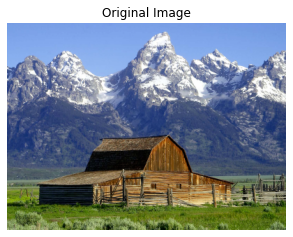

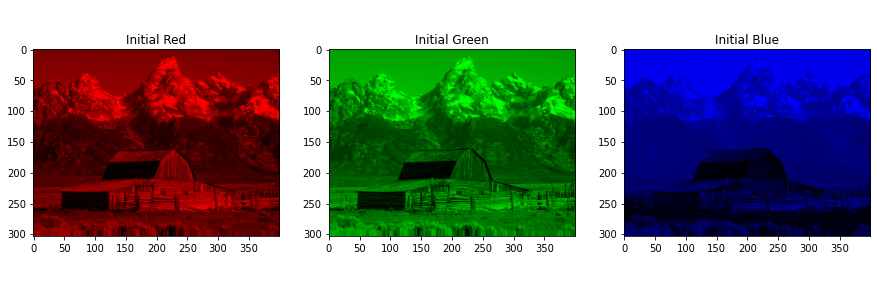

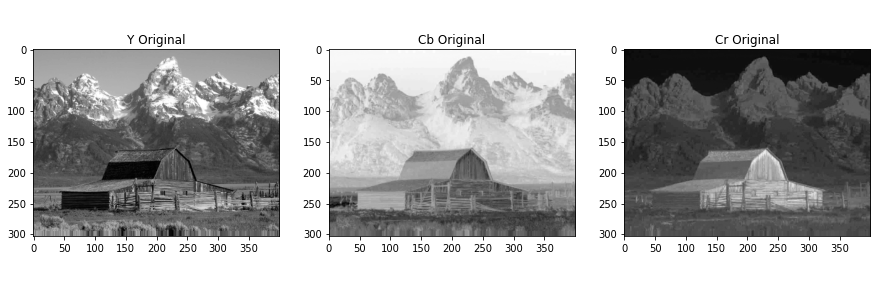

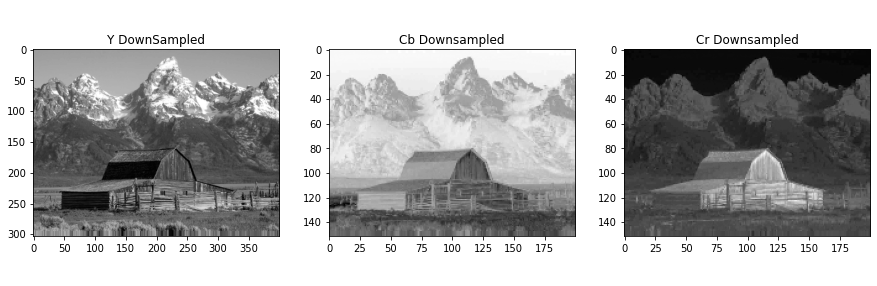

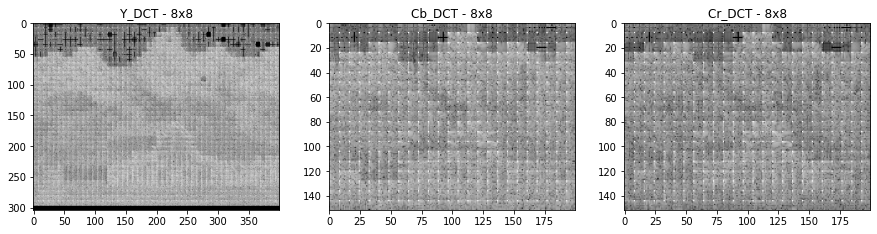

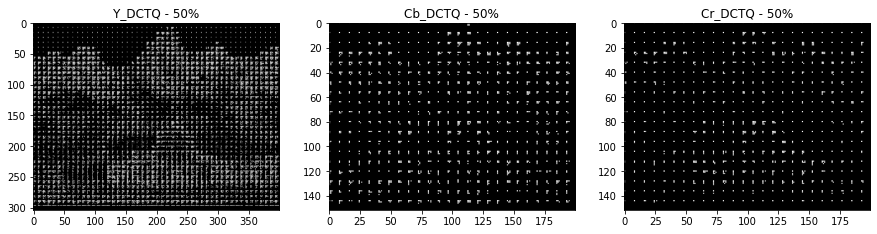

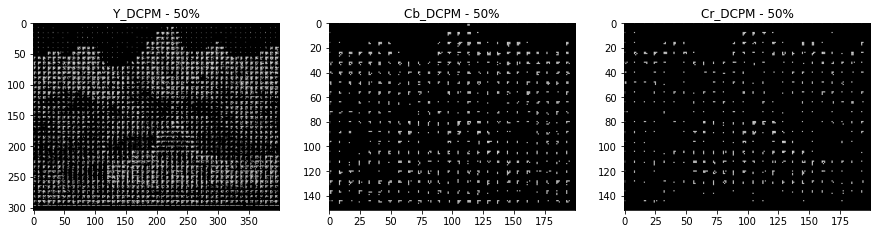

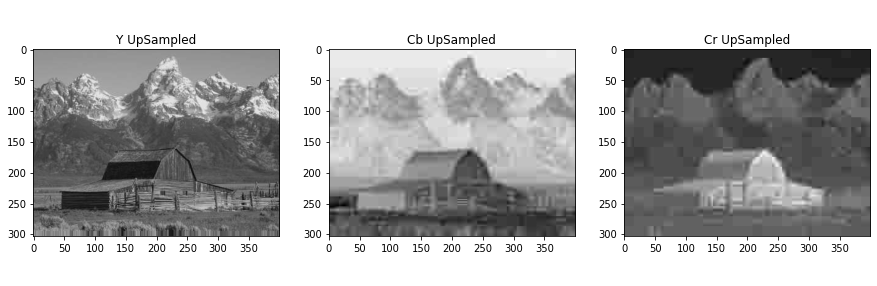

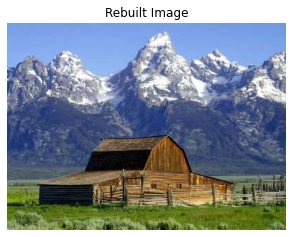

In [60]:
import matplotlib.colors as cb_linesr
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct


def main():
    plt.close('all')

    Y_dcpm, Cb_dcpm, Cr_dcpm = encoder()
    decoder(Y_dcpm, Cb_dcpm, Cr_dcpm)

    plt.show()


if __name__ == '__main__':
    img_name = "barn_mountains"

    global dSample, opt, requiredQuality
    requiredQuality = 50
    dSample = 420
    opt = 8
    
    cmr = cb_linesr.LinearSegmentedColormap.from_list(
        'cmr', [(0, 0, 0), (1, 0, 0)], N=256)
    cmg = cb_linesr.LinearSegmentedColormap.from_list(
        'cmg', [(0, 0, 0), (0, 1, 0)], N=256)
    cmb = cb_linesr.LinearSegmentedColormap.from_list(
        'cmb', [(0, 0, 0), (0, 0, 1)], N=256)
    cmGray = cb_linesr.LinearSegmentedColormap.from_list(
        'cmGray', [(0, 0, 0), (1, 1, 1)], N=256)

    main()